In [16]:
from qualities import QUALITY_DICT, ENHARMONICS, KEYS
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import itertools
import numpy as np
import ast

In [17]:
plt.style.use('seaborn-white')
IMAGES_PATH = "images/data_stats/"
EXT = ".pdf"

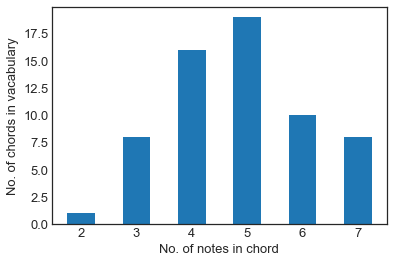

In [47]:
lengths = [len(v) for v in dict(QUALITY_DICT).values()]
labels, values = zip(*Counter(lengths).items())
indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5-0.25, labels)
title = "Polyphony of chords distribution"
# plt.title(title)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=13)
plt.xlabel("No. of notes in chord", fontsize=13)
plt.ylabel("No. of chords in vacabulary", fontsize=13)
plt.savefig(IMAGES_PATH+title+EXT)
plt.show()

In [19]:
df = pd.read_csv("data/chords_string_rep_no_bass.csv")
list_of_songs = [ast.literal_eval(chords_string) for chords_string in df["chords"]]
all_chords = list(itertools.chain.from_iterable(list_of_songs))
all_chords_text = ",".join(all_chords)
for key in 'CDEFGAB':
    all_chords_text = all_chords_text.replace(key+"b", "")
    all_chords_text = all_chords_text.replace(key+"#", "")
    all_chords_text = all_chords_text.replace(key, "")
all_chords_types = all_chords_text.split(",")

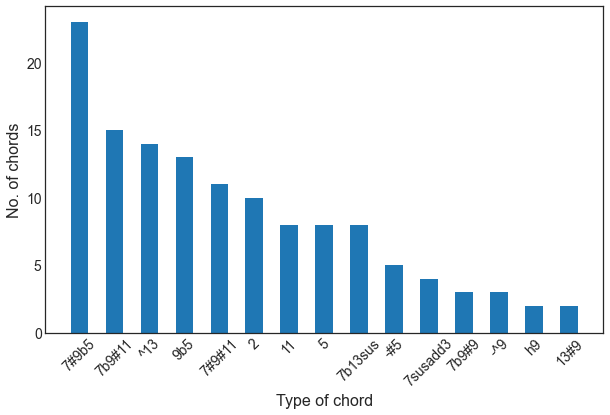

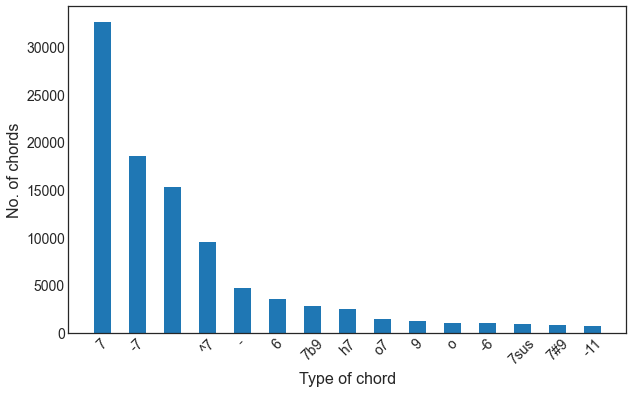

In [42]:
most_common_15 = zip(*(Counter(all_chords_types).most_common()[-15:]))
least_common_15 = zip(*(Counter(all_chords_types).most_common()[:15]))
title_1 = "15 Least Common Chord Types Distribution"
title_2 = "15 Most Common Chord Types Distribution"

for hist_data, title in zip([most_common_15, least_common_15], [title_1, title_2]):
    labels, values = hist_data
    indexes = np.arange(len(labels))
    width = 0.5
    fig = plt.gcf()
    ax = plt.gca()
    fig.set_size_inches(10, 6)
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5-0.25, labels)
#     plt.title(title)
    ax.xaxis.set_tick_params(rotation=45)
    ax = plt.gca()
    ax.tick_params(axis='both', which='major', labelsize=13)
    plt.xlabel("Type of chord", fontsize= 16)
    plt.ylabel("No. of chords", fontsize= 16)
    plt.savefig(IMAGES_PATH+title+EXT)
    plt.show()

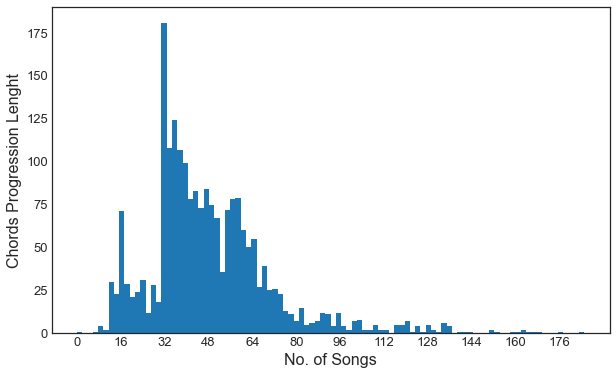

In [43]:
lengths = [len(song) for song in list_of_songs]
labels, values = zip(*Counter(lengths).items())
indexes = np.arange(0,max(labels), 16)
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(10, 6)
width = 0.5

plt.hist(lengths, bins=8*len(indexes))
plt.xticks(indexes)

title = "Chords Progression Lenghts Distribution"
# plt.title(title)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=13)
plt.xlabel("No. of Songs", fontsize= 16)
plt.ylabel("Chords Progression Lenght", fontsize= 16)
plt.savefig(IMAGES_PATH+title+EXT)
plt.show()

In [22]:
df = pd.read_csv("data/chords_string_rep_no_bass.csv")
list_of_songs = [ast.literal_eval(chords_string) for chords_string in df["chords"]]
all_chords = list(itertools.chain.from_iterable(list_of_songs))
all_chords_text = ",".join(all_chords)
for chord_type in sorted(QUALITY_DICT.keys(), key=len, reverse=True):
    all_chords_text = all_chords_text.replace(chord_type, "")
    all_chords_text = all_chords_text.replace("Cb", "B")
all_chords_notes = all_chords_text.split(",")

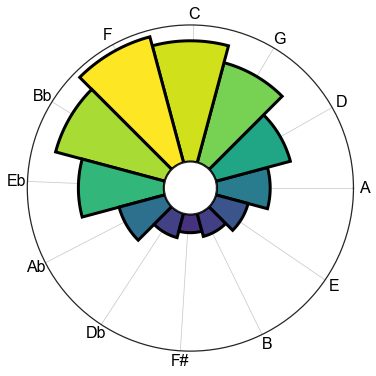

In [26]:
labels, values = zip(*(Counter(all_chords_notes).most_common()))
labels = [label.replace("Gb", "F#") for label in labels]
labels_circle = ['A','D','G','C','F','Bb','Eb','Ab','Db','F#','B','E']
values_circle = np.array([values[labels.index(label)] for label in labels_circle])
values_circle = values_circle/values_circle.max()

N = 12
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = values_circle
width = np.pi / 6 * np.ones(N)
fig = plt.gcf()
fig.set_size_inches(6, 6)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0, edgecolor='k', linewidth=3)
ax.yaxis.grid(False)
ax.set_yticklabels([])
ax.set_thetagrids(theta* 18 * np.pi, labels=labels_circle, fontsize=16, weight="normal", color="black")
ax.set_rorigin(-0.2)
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r))
title = "Chord Roots Distribution"
# plt.title(title,fontsize= 20)
plt.savefig(IMAGES_PATH+title+EXT)
plt.show()